In [274]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d

phi = (1 + 5 ** 0.5) / 2
e=np.e

In [341]:
#The test function that we will be using.  
def test(x:float)->float:
    if x>0:
        return x**x
    else:
        return x**2+1

interval=[-2,2]

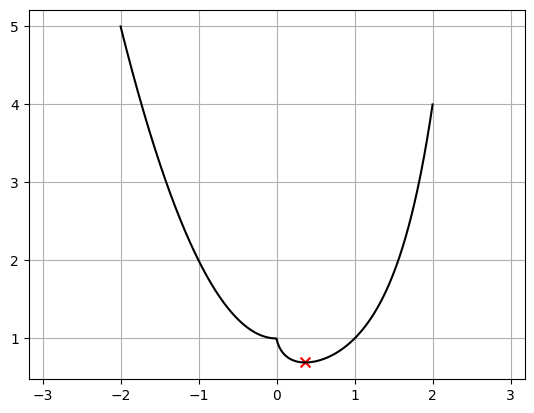

Miminum x value: 0.36787944117144233


In [345]:
#Plot of the test function with marked minimum value.
x=np.linspace(-2,2,1000)
plt.plot(x,list(map(test,x)),color="black")
plt.scatter(x=1/e,y=test(1/e),color="red",marker="x",s=50)
plt.axis('equal')
plt.grid()
plt.savefig("f_plot.png")
plt.show()

minimum_exact=1/np.e # Minimum occurs at 1/e
print(f"Miminum x value: {minimum_exact}")


In [183]:
def MPI(f, a:float, b:float, N:int=6, delta:float=0.01, verbose=True)->float:
    """
    Parameters:
        f (callable): The function to minimize.
        a (float): The start of the interval.
        b (float): The end of the interval.
        N(int): Required number of tierations.
        delta (float): The tolerance for convergence.

    Returns:
        float: The x-value of the aproximate minimum.
        list[float]: History of the aproximate minima at each iteration.
    """
    if verbose:
        print(f"iteration 0  a:{a:.6f} b:{b:.6f}  max-error:{((b-a)/2):.6f}")
    c=(a+b)/2
    history=[c]
    for i in range(1,N):
        if b-a<=delta:
            break 
        if f(c-delta)>f(c+delta):
            a=c-delta
        else:
            b=c+delta
        c=(a+b)/2
        history.append(c)
        if verbose:
            print(f"iteration {i}  a:{a:.6f} b:{b:.6f}  max-error:{((b-a)/2):.6f}")
    return history[-1], history 
    

In [347]:
mpi_result, mpi_run_history=MPI(test,a=-3,b=3,N=10,delta=0.0001)
print()
print(f"Result : {mpi_result:.10f}")
print(f"Absolute error : {abs(mpi_result-minimum_exact):.10f}")
print(f"Run history : {mpi_run_history}")

iteration 0  a:-3.000000 b:3.000000  max-error:3.000000
iteration 1  a:-0.000100 b:3.000000  max-error:1.500050
iteration 2  a:-0.000100 b:1.500050  max-error:0.750075
iteration 3  a:-0.000100 b:0.750075  max-error:0.375087
iteration 4  a:-0.000100 b:0.375087  max-error:0.187594
iteration 5  a:0.187394 b:0.375087  max-error:0.093847
iteration 6  a:0.281141 b:0.375087  max-error:0.046973
iteration 7  a:0.328014 b:0.375087  max-error:0.023537
iteration 8  a:0.351451 b:0.375087  max-error:0.011818
iteration 9  a:0.363169 b:0.375087  max-error:0.005959

Result : 0.3691283203
Absolute error : 0.0012488791
Run history : [0.0, 1.49995, 0.749975, 0.3749875, 0.18749375, 0.28124062499999997, 0.32811406249999997, 0.35155078124999994, 0.36326914062499993, 0.3691283203125]


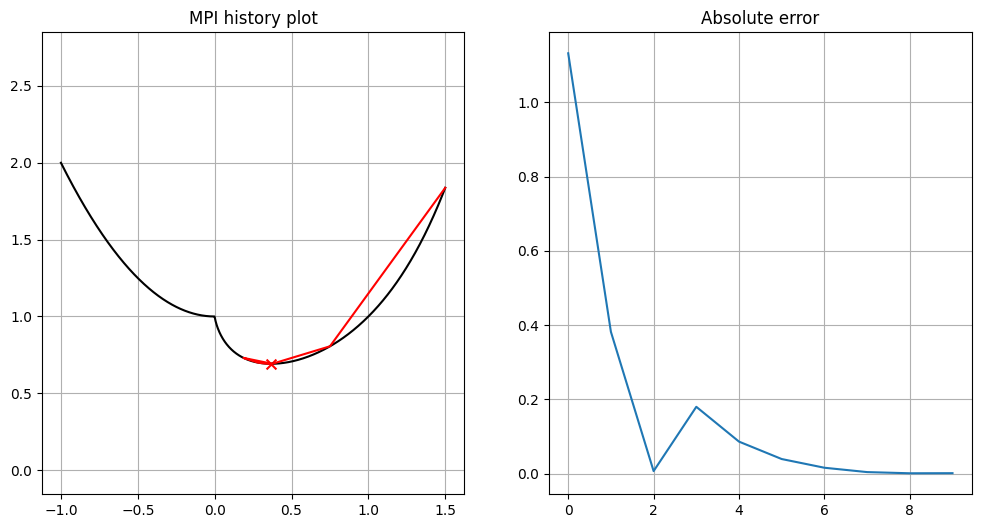

Miminum value: 0.36787944117144233


In [346]:
#Plot of the test function with mpi history and absolute error
x=np.linspace(-1,1.5,1000)
fig, ax=plt.subplots(ncols=2,figsize=(12,6))
ax[0].plot(x,list(map(test,x)),color="black")
ax[0].scatter(x=1/e,y=test(1/e),color="red",marker="x",s=50)
ax[0].plot(mpi_run_history,list(map(test,mpi_run_history)),color="red")

ax[1].plot([abs(minimum_exact-i) for i in mpi_run_history])

ax[0].axis('equal')
ax[0].grid()
ax[1].grid()
ax[0].title.set_text('MPI history plot')
ax[1].title.set_text('Absolute error')
plt.savefig("mpi_history.png")
plt.show()

#Minimum occurs at 1/e
minimum_exact=1/np.e
print(f"Miminum value: {minimum_exact}")


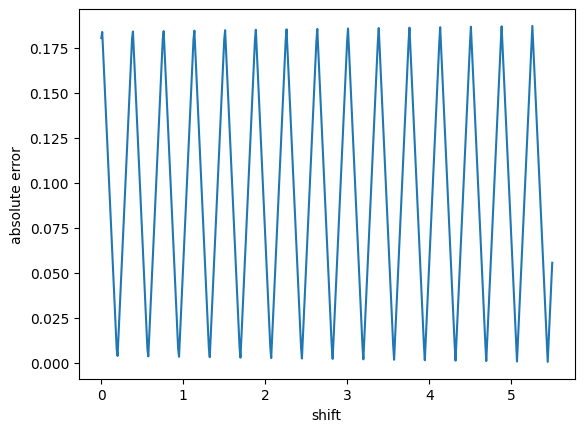

In [348]:
granularity=500
n_iterations=5
hist_matrix_mpi=np.zeros(shape=(n_iterations,granularity))
for i, shift in enumerate(np.linspace(0,5.5,granularity)):
    hist_matrix_mpi[:,i]=MPI(test,a=0-shift,b=6-shift,N=n_iterations,delta=0.0001,verbose=False)[1]

error_matrix_mpi=abs(hist_matrix_mpi-np.full(shape=hist_matrix_mpi.shape,fill_value=minimum_exact))
fig, ax = plt.subplots()
ax.plot(np.linspace(0,5.5,granularity),error_matrix_mpi[-1,:])
ax.set_xlabel("shift")
ax.set_ylabel("absolute error")
plt.savefig("shift-error_mpi.png")
plt.show()

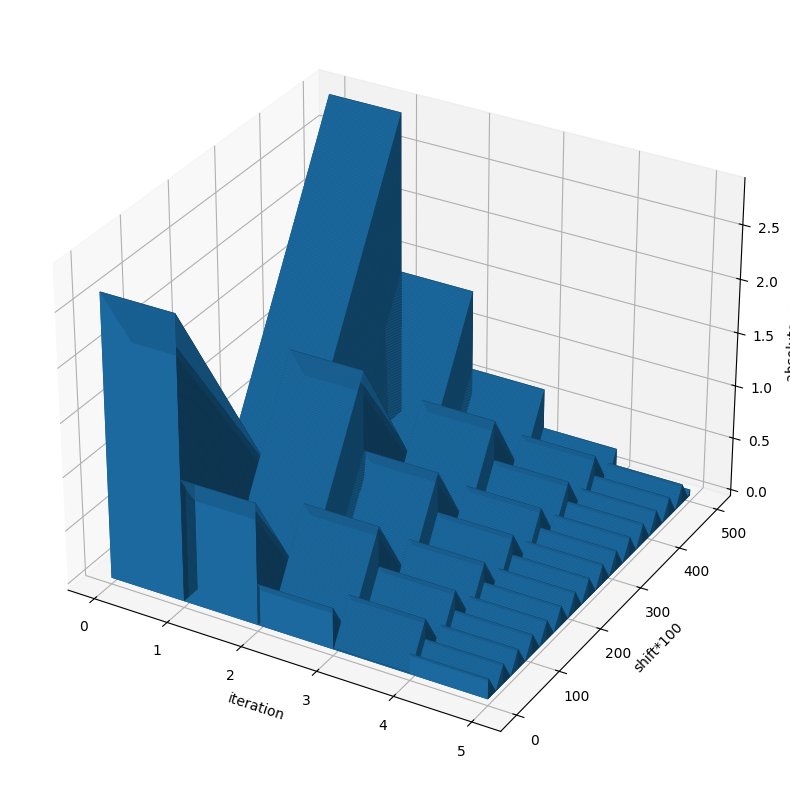

In [349]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(projection='3d')

_x = np.arange(n_iterations)
_y =  np.arange(granularity)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = error_matrix_mpi[x,y]
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_xlabel("iteration")
ax1.set_ylabel("shift*100")
ax1.set_zlabel("absolute error")
# ax1.set_title('Absolute error depending on the shift of starting interval at each iteration')

plt.savefig("iteration-shift-error_mpi.png")
plt.show()

In [350]:
def MZR(f, a:float, b:float, N:int=10 ,verbose=True)->tuple[float,list]:
    phi = (1 + 5 ** 0.5) / 2  # Golden ratio
    resphi = 2 - phi          # 1 - 1/phi
    history=[]
    if verbose:
        print(f"iteration 0 a:{a:.6f}   b:{b:.6f}  max-error:{((b-a)/2):.6f}")
    history.append((a+b)/2)
    for i in range(1,N):
        c = a + resphi * (b - a)
        d = b - resphi * (b - a)
        if f(c) < f(d):
            b = d
        else:
            a = c
        if verbose:
            print(f"iteration {i} a:{a:.6f}   b:{b:.6f}  max-error:{((b-a)/2):.6f}")
        history.append((a+b)/2)
    return history[-1], history

In [351]:
mzr_result, mzr_run_history=MZR(test,a=-3,b=3,N=19)
print()
print(f"Result : {mzr_result:.10f}")
print(f"Absolute error : {abs(mzr_result-minimum_exact):.10f}")
print(f"Run history : {mzr_run_history}")

iteration 0 a:-3.000000   b:3.000000  max-error:3.000000
iteration 1 a:-0.708204   b:3.000000  max-error:1.854102
iteration 2 a:-0.708204   b:1.583592  max-error:1.145898
iteration 3 a:-0.708204   b:0.708204  max-error:0.708204
iteration 4 a:-0.167184   b:0.708204  max-error:0.437694
iteration 5 a:0.167184   b:0.708204  max-error:0.270510
iteration 6 a:0.167184   b:0.501553  max-error:0.167184
iteration 7 a:0.294902   b:0.501553  max-error:0.103326
iteration 8 a:0.294902   b:0.422619  max-error:0.063859
iteration 9 a:0.343685   b:0.422619  max-error:0.039467
iteration 10 a:0.343685   b:0.392469  max-error:0.024392
iteration 11 a:0.343685   b:0.373835  max-error:0.015075
iteration 12 a:0.355202   b:0.373835  max-error:0.009317
iteration 13 a:0.362319   b:0.373835  max-error:0.005758
iteration 14 a:0.362319   b:0.369437  max-error:0.003559
iteration 15 a:0.365038   b:0.369437  max-error:0.002199
iteration 16 a:0.366718   b:0.369437  max-error:0.001359
iteration 17 a:0.366718   b:0.368398

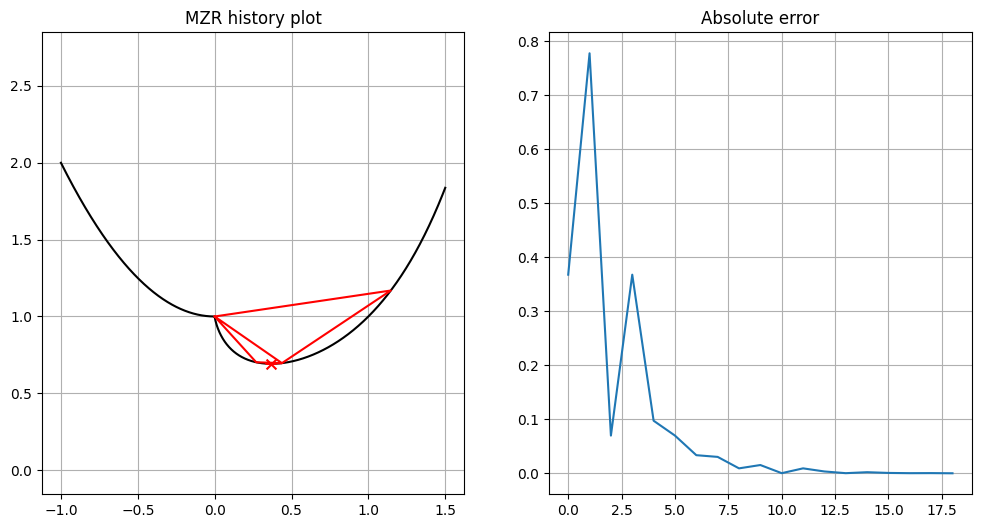

Miminum value: 0.36787944117144233


In [352]:
#Plot of the test function with mzr run history 
x=np.linspace(-1,1.5,1000)
fig, ax=plt.subplots(ncols=2,figsize=(12,6))
ax[0].plot(x,list(map(test,x)),color="black")
ax[0].scatter(x=1/e,y=test(1/e),color="red",marker="x",s=50)
ax[0].plot(mzr_run_history,list(map(test,mzr_run_history)),color="red")

ax[1].plot([abs(minimum_exact-i) for i in mzr_run_history])

ax[0].axis('equal')
ax[0].grid()
ax[1].grid()
ax[0].title.set_text('MZR history plot')
ax[1].title.set_text('Absolute error')
plt.savefig("mzr_history.png")
plt.show()

#Minimum occurs at 1/e
minimum_exact=1/np.e
print(f"Miminum value: {minimum_exact}")

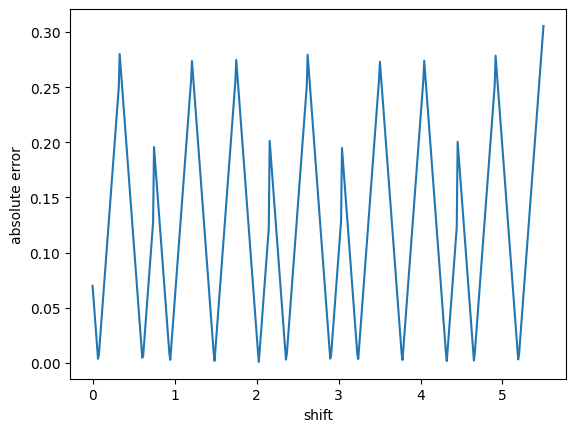

In [353]:
granularity=500
n_iterations=5
hist_matrix_mzr=np.zeros(shape=(n_iterations,granularity))
for i, shift in enumerate(np.linspace(0,5.5,granularity)):
    hist_matrix_mzr[:,i]=MZR(test,a=0-shift,b=6-shift,N=n_iterations,verbose=False)[1]

error_matrix_mzr=abs(hist_matrix_mzr-np.full(shape=hist_matrix_mzr.shape,fill_value=minimum_exact))
fig, ax = plt.subplots()
ax.plot(np.linspace(0,5.5,granularity),error_matrix_mzr[-1,:])
ax.set_xlabel("shift")
ax.set_ylabel("absolute error")
plt.savefig("shift-error_mzr.png")
plt.show()

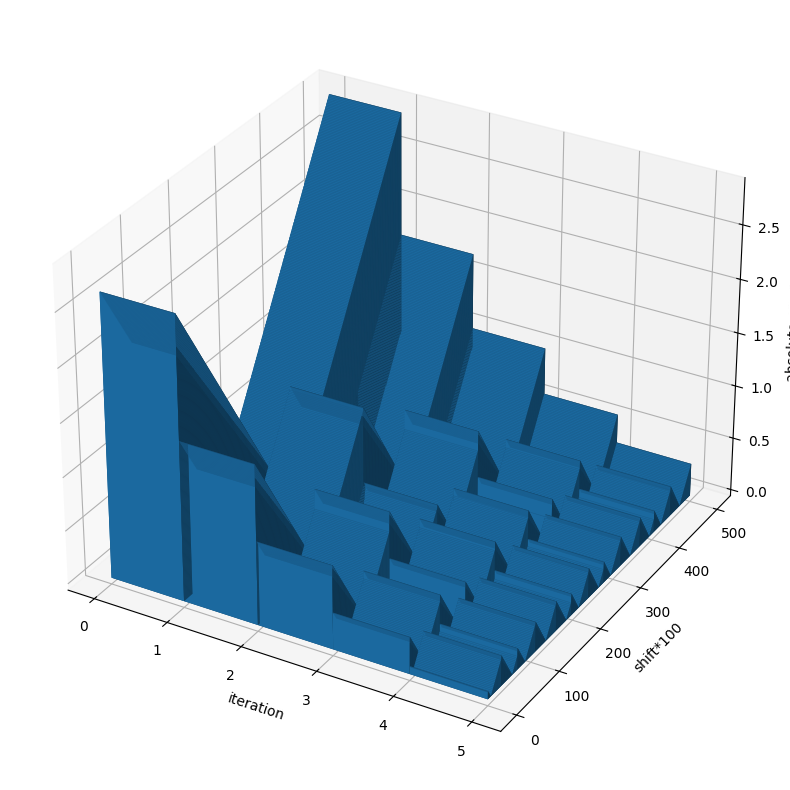

In [354]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot( projection='3d')

_x = np.arange(n_iterations)
_y = np.arange(granularity)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = error_matrix_mzr[x,y]
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_xlabel("iteration")
ax1.set_ylabel("shift*100")
ax1.set_zlabel("absolute error")
plt.savefig("iteration-shift-error_mzr.png")
plt.show()